In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

data_dir = "/content/drive/MyDrive/MNSIT/trainingSet/trainingSet"
print("Folders inside trainingSet:")
print(os.listdir(data_dir))


Folders inside trainingSet:
['9', '5', '1', '2', '7', '8', '0', '4', '3', '6']


In [ ]:
import os, cv2
import numpy as np

data_dir = "/content/drive/MyDrive/MNSIT/trainingSet/trainingSet"

X, y = [], []

print("folder-wise image counts:")
for label in sorted(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, label)
    if not os.path.isdir(folder_path):
        continue

    img_files = os.listdir(folder_path)
    print(f"  → Folder {label}: {len(img_files)} images")

    for img_file in img_files:
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (28, 28))
        X.append(img)
        y.append(int(label))

# Convert lists to numpy arrays
X = np.array(X).reshape(-1, 28, 28, 1)
y = np.array(y)

print("\n✅ Data loaded successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)



folder-wise image counts:
  → Folder 0: 4136 images
  → Folder 1: 4684 images
  → Folder 2: 4177 images
  → Folder 3: 4351 images
  → Folder 4: 4072 images
  → Folder 5: 3806 images
  → Folder 6: 4139 images
  → Folder 7: 4401 images
  → Folder 8: 4063 images
  → Folder 9: 4216 images

✅ Data loaded successfully!
X shape: (42045, 28, 28, 1)
y shape: (42045,)


In [ ]:
print("Pixel value range:", X.min(), "to", X.max())


Pixel value range: 0 to 255


In [ ]:
X =X/255

In [ ]:
print("Pixel value range:", X.min(), "to", X.max())


Pixel value range: 0.0 to 1.0


In [ ]:
X.shape

(42045, 28, 28, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify =y)


In [ ]:
X_valid,X_train = X_train_full[:30000],X_train_full[30000:]
y_valid,y_train = y_train_full[:30000],y_train_full[30000:]


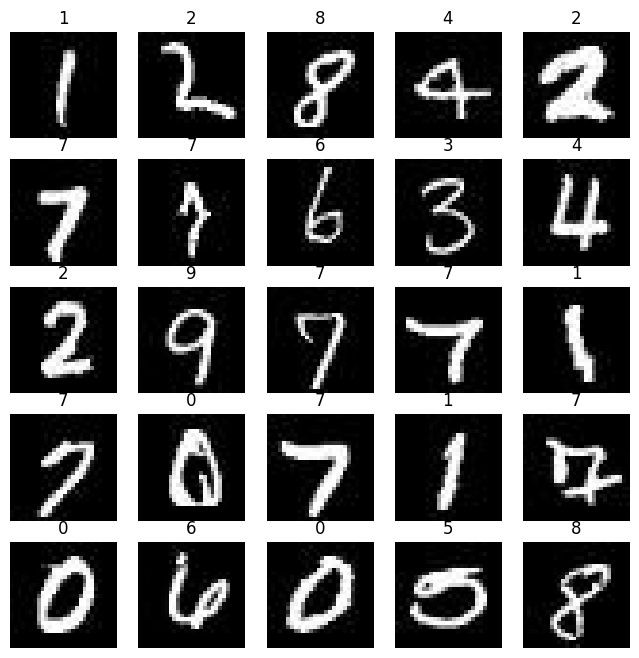

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')
plt.show()


In [ ]:
#Building a CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile model
model.compile(loss="sparse_categorical_crossentropy",    #This is the loss we use for multiclass classification problem
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.6570 - loss: 1.1392 - val_accuracy: 0.8940 - val_loss: 0.3551
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9175 - loss: 0.2622 - val_accuracy: 0.9017 - val_loss: 0.3260
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9459 - loss: 0.1775 - val_accuracy: 0.9252 - val_loss: 0.2474
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9757 - loss: 0.0929 - val_accuracy: 0.9287 - val_loss: 0.2358
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9857 - loss: 0.0524 - val_accuracy: 0.9325 - val_loss: 0.2395
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9917 - loss: 0.0343 - val_accuracy: 0.9408 - val_loss: 0.2252
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9973 - loss: 0.0160 - val_accuracy: 0.9161 - val_loss: 0.3201
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9930 - loss: 0.0301 - val_accu

In [ ]:
model.evaluate(X_test, y_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9460 - loss: 0.2408


[0.2490069717168808, 0.9437507390975952]

In [11]:
experiment_results = {"filters": [], "filter_dim": [], "accuracy": [], "loss": []}

for filters in [2,4,8,16,32,64,128,256]:
  for filter_dim in range(3, 12, 2):
    #Building a CNN model
    model = keras.models.Sequential([
        keras.layers.Conv2D(filters, filter_dim, activation="relu", padding="same", input_shape=[28, 28, 1]),
        keras.layers.MaxPooling2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    #Compile (loss, optimizer, metrics)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    #Train with validation split
    history = model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=10,
        batch_size=128,
        verbose=1
    )

    #Compute accuracy ans loss
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    experiment_results["filters"].append(filters)
    experiment_results["filter_dim"].append(filter_dim)
    experiment_results["accuracy"].append(test_acc)
    experiment_results["loss"].append(test_loss)
    print("\n")
    print(f"Filters: {filters}, Filter dim: {filter_dim}, Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")
    print("\n")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.4551 - loss: 1.8499 - val_accuracy: 0.8187 - val_loss: 0.6746
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8294 - loss: 0.6039 - val_accuracy: 0.8901 - val_loss: 0.3388
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9054 - loss: 0.3407 - val_accuracy: 0.9093 - val_loss: 0.2928
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9278 - loss: 0.2655 - val_accuracy: 0.9066 - val_loss: 0.2679
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9390 - loss: 0.2241 - val_accuracy: 0.9121 - val_loss: 0.2401
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9488 - loss: 0.1848 - val_accuracy: 0.9286 - val_loss: 0.2388
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9568 - loss: 0.1581 - val_accuracy: 0.9176 - val_loss: 0.2488
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9629 - loss: 0.1364 - val_accuracy: 0.9231 - v

In [14]:
from google.colab import files
df = pd.DataFrame(experiment_results)
df.to_csv('digits_mnist_experiments.csv', index=False)
files.download('digits_mnist_experiments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
df

,filters,filter_dim,accuracy,loss
0,2,3,0.929005,0.243776
1,2,5,0.928648,0.231198
2,2,7,0.930432,0.227919
3,2,9,0.938994,0.192792
4,2,11,0.939351,0.208673
5,4,3,0.932929,0.228742
6,4,5,0.938161,0.210502
7,4,7,0.936972,0.203917
8,4,9,0.917469,0.264268
9,4,11,0.940421,0.195177


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['filters'].plot(kind='hist', bins=20, title='filters')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['filter_dim'].plot(kind='hist', bins=20, title='filter_dim')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='filters', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='filters', y='filter_dim', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='filter_dim', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='accuracy', y='loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['filter_dim']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('filter_dim')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['filters'].plot(kind='line', figsize=(8, 4), title='filters')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['filter_dim'].plot(kind='line', figsize=(8, 4), title='filter_dim')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
'''Effect of kernel size:

Smaller kernel (3×3) → captures fine details.

Larger kernel (7×7, 9×9, 11×11) → captures broader patterns.
✅ Observation: There’s an optimal kernel size for a dataset. Too large can over-smooth or overfit.'''

'''Effect of number of filters:

More filters → model can capture more features.

Fewer filters → faster, but might underfit (cannot capture enough patterns).
✅ Observation: Accuracy generally improves as filters increase.'''


# FILTER SMALL - FILTER DIM LARGE -ACC HIGH ( BUT IN THIS MODEL THE FILTER DIM WHICH ARE LARGE GETTING MORE ACC)

In [ ]:
'''For this dataset (small grayscale images, digits):

Best combination is moderate-to-large number of filters (64–128)

With medium-to-large kernel sizes (7–9)

Very small kernels (3) → accuracy is lower

Very large kernels (11) → may slightly improve accuracy but sometimes increases loss'''

In [21]:
df

,filters,filter_dim,accuracy,loss
0,2,3,0.929005,0.243776
1,2,5,0.928648,0.231198
2,2,7,0.930432,0.227919
3,2,9,0.938994,0.192792
4,2,11,0.939351,0.208673
5,4,3,0.932929,0.228742
6,4,5,0.938161,0.210502
7,4,7,0.936972,0.203917
8,4,9,0.917469,0.264268
9,4,11,0.940421,0.195177


In [16]:
#Prediction
X_new = X_test[:3]


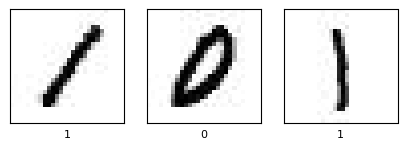

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for i in range(len(X_new)):
    plt.subplot(1, len(X_new), i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i], fontsize=8) # Use y_test for labels of X_test subset
plt.show()

In [18]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
y_test[:3]

array([1, 0, 1])

In [20]:
import numpy as np

y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([1, 0, 1])